<a href="https://colab.research.google.com/github/NVietAnh010801/nh-ndi-nkhu-nm-t/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_BT_10TraiCay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


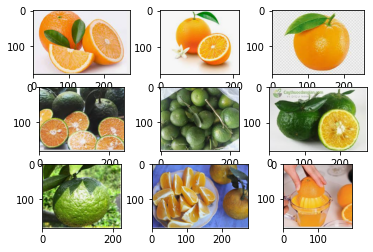

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Traicay/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'cam.'+str(i+1)+'.png'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Traicay/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Chuoi'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Dau'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Dudu'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('kiwi'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('le'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mit'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('tao'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vaithieu'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('xoai'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('cam'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10TraiCay_photos.npy', photos)
save('10TraiCay_labels.npy', labels)

(15, 200, 200, 3) (15,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 12s 12s/step - loss: 403.0726 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 4448.5171 - accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 0s 54ms/step - loss: 5905.7046 - accuracy: 0.0667
Epoch 4/50
1/1 [==============================] - 0s 53ms/step - loss: 2515.6047 - accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 1255.7255 - accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 1103.3119 - accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 52ms/step - loss: 749.6926 - accuracy: 0.6667
Epoch 8/50
1/1 [==============================] - 0s 51ms/step - loss: 382.7578 - accuracy: 0.6667
Epoch 9/50
1/1 [==============================] - 0s 52ms/step - loss: 432.9300 - accuracy: 0.0667
Epoch 10/50
1/1 [==============================] - 0s 53ms/step - loss: 57.7083 - accuracy: 0.60

In [7]:
model.evaluate(photos,labels)

1/1 [==============================] - 0s 208ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [8]:
model.save('10TraiCay_Final.h5')

In [9]:
from keras.models import load_model
models=load_model('10TraiCay_Final.h5')

In [10]:
classes = ["cam","chuoi","mit","DuDu","kiwi","Le","tao","vaithieu","dau","xoai"]

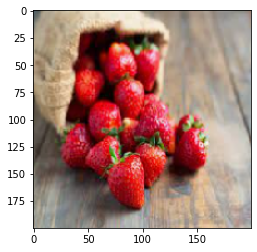

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Colab Notebooks/Traicay/dau.png', target_size=(200,200))
plt.imshow(img)

In [13]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.05161473 0.010294   0.00461016 0.04959435 0.0225188  0.04693988
  0.32189038 0.19442767 0.10097743 0.19713266]]


'tao'